In [2]:
# %load_ext autoreload
# %autoreload 2

# Rhine level prediction

Predict the rhine level in Bonn.

[Feedback link for this task](https://beta.ins.uni-bonn.de/feedback/mllab?obj=Rhinelevel)

Source for the data:

    Wasserstraßen- und Schifffahrtsverwaltung des Bundes (WSV),
    bereitgestellt durch die Bundesanstalt für Gewässerkunde (BfG).

which (unofficially) translates to

    German Federal Waterways and Shipping Administration (WSV),
    provided by the German Federal Institute of Hydrology (BfG).

You may need to install additional packages. This can be done using the following command:

In [3]:
!pip install -r mllab/rhinelevel/requirements.txt
!jupyter nbextension enable --py --sys-prefix ipyleaflet

Enabling notebook extension jupyter-leaflet/extension...
      - Validating: ok


In [1]:
import pandas as pd
import numpy as np
from mllab.rhinelevel import wsv, dwd
CACHE = './cache'

The dataset is expected to be stored in the folder `data` relative to this notebook.

In [2]:
levels = wsv.RiverLevelData('data/riverlevels.tar.bz2', CACHE)

We plot the stations in a map. This might need a restart of Jupyter in order to work.

In [3]:
import ipyleaflet as leaf
m = leaf.Map(center=(50.2, 7.5), zoom=7, basemap=leaf.basemaps.Hydda.Full)
markers = []
for station in levels.stations():
    title = "{}, river km {}, zero points over sea {}".format(station.name, station.river_km, station.zero)
    m += leaf.Marker(location=station.pos, draggable=False, title=title)

m

Map(basemap={'url': 'http://{s}.tile.openstreetmap.se/hydda/full/{z}/{x}/{y}.png', 'max_zoom': 18, 'attributio…

Collect the station data into a Pandas DataFrame

In [4]:
df = levels.to_frame()

Parse Andernach
Parse Bingen
Parse Bonn
Parse Frankfurt Osthafen
Parse Kalkofen Neu
Parse Kaub
Parse Koblenz
Parse Koblenz Up
Parse Mainz
Parse Oberwinter
Parse Oestrich
Parse Raunheim
Parse Rockenau Ska
Parse Speyer
Parse Worms


In [5]:
df[500000:500010]

,Andernach,Bingen,Bonn,Frankfurt Osthafen,Kalkofen Neu,Kaub,Koblenz,Koblenz Up,Mainz,Oberwinter,Oestrich,Raunheim,Rockenau Ska,Speyer,Worms
1995-04-06 07:15:00+00:00,461.0,311.0,498.0,215.0,333.0,371.0,389.0,361.0,419.0,415.0,289.0,191.0,236.0,486.0,339.0
1995-04-06 07:30:00+00:00,461.0,311.0,498.0,216.0,330.0,371.0,388.0,362.0,419.0,414.0,289.0,191.0,240.0,486.0,339.0
1995-04-06 07:45:00+00:00,460.0,311.0,497.0,216.0,329.0,371.0,388.0,362.0,420.0,414.0,289.0,190.0,238.0,487.0,339.0
1995-04-06 08:00:00+00:00,460.0,311.0,497.0,217.0,327.0,371.0,388.0,358.0,419.0,413.0,288.0,190.0,236.0,486.0,339.0
1995-04-06 08:15:00+00:00,459.0,311.0,497.0,215.0,325.0,371.0,386.0,357.0,419.0,413.0,288.0,191.0,240.0,486.0,339.0
1995-04-06 08:30:00+00:00,459.0,311.0,496.0,213.0,325.0,371.0,386.0,357.0,418.0,413.0,288.0,193.0,239.0,486.0,338.0
1995-04-06 08:45:00+00:00,458.0,310.0,495.0,215.0,325.0,371.0,386.0,356.0,418.0,412.0,288.0,190.0,239.0,486.0,338.0
1995-04-06 09:00:00+00:00,458.0,310.0,494.0,216.0,324.0,371.0,385.0,355.0,418.0,411.0,288.0,189.0,236.0,486.0,337.0
1995-04-06 09:15:00+00:00,457.0,310.0,494.0,214.0,324.0,370.0,384.0,355.0,418.0,411.0,288.0,188.0,234.0,486.0,338.0
1995-04-06 09:30:00+00:00,457.0,310.0,494.0,214.0,324.0,370.0,383.0,358.0,418.0,410.0,288.0,186.0,237.0,486.0,338.0


### Pandas info

The DataFrame `df` is index by a time series, see the [documentation](https://pandas.pydata.org/pandas-docs/stable/timeseries.html) for more details.

To get a NumPy array just run `df.as_matrix()`. You can select which columns you want by

```python
df[['Worms', 'Kaub']].as_matrix()
```

## Remarks

- Not all stations start at the same time, in this case there are `NaN` values.
- Also, there were some failures in which case there is also a `NaN` stored.
    - The [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/missing_data.html) might be helpful.
- You might want to select a subset of available stations at the beginning (pick reasonable ones)
    - The flow speed of the river is at around 7km/h, this varies, though. Hover over the map markers to see how far the stations are apart
- You can also check how far you can make predictions into the future
- A wavelet transformation could be interesting as a feature map, check out [PyWavelet](https://pywavelets.readthedocs.io/en/latest/)

## Real-time prediction

If you are interested in this, you can get real time measurements for the stations by using

```python
df = levels.to_frame(recent=True)
```

This will return a dataframe with measurements from the last 30 days, also in 15 minute intervals.

Zu Beginn droppe ich alle Zeilen mit NaN-Werten

In [6]:
no_NaN_df = df.dropna()

Um ein Gefühl für die Daten zu bekommen, schauen wir uns zunächst den Verlauf des Rheinpegels in Bonn für den gesamten Beobachtungszeitraum an:

Text(0, 0.5, 'Wasserstand')

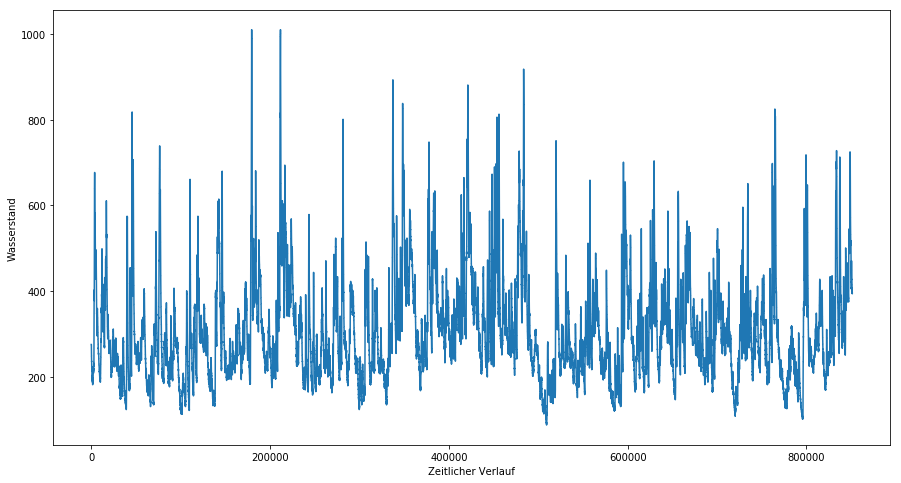

In [7]:
import matplotlib.pyplot as plt # bei mir muss man das 2-mal laufen lassen damit die plots kommen
%matplotlib inline

Bonn = no_NaN_df[['Bonn']].values

fig = plt.figure(figsize=(15,8))
plt.plot(np.arange(0, len(Bonn[:,0])), Bonn[:,0])
plt.xlabel('Zeitlicher Verlauf')
plt.ylabel('Wasserstand')

Für ein Jahr (Juni 2012 - Juni 2013):

Text(0, 0.5, 'Wasserstand')

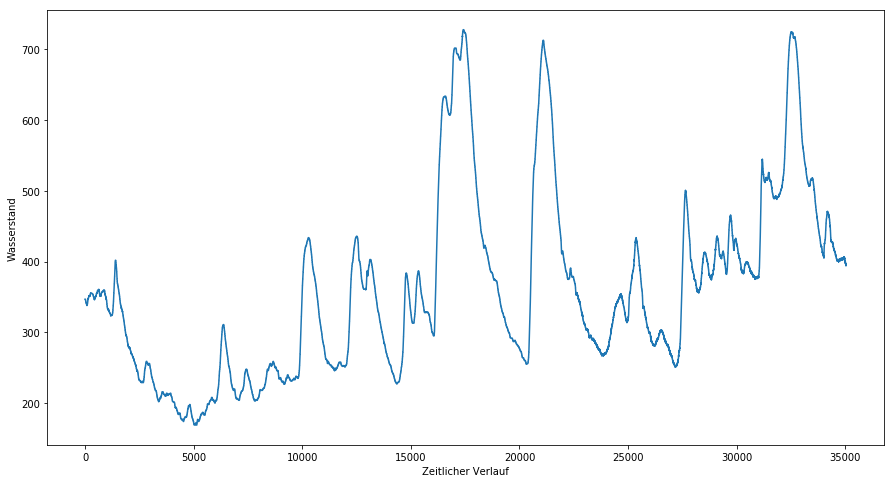

In [8]:
fig = plt.figure(figsize=(15,8))
plt.plot(np.arange(0, len(Bonn[-35040:,0])), Bonn[-35040:,0])
plt.xlabel('Zeitlicher Verlauf')
plt.ylabel('Wasserstand')

Für einen Monat (Juni 2013):

Text(0, 0.5, 'Wasserstand')

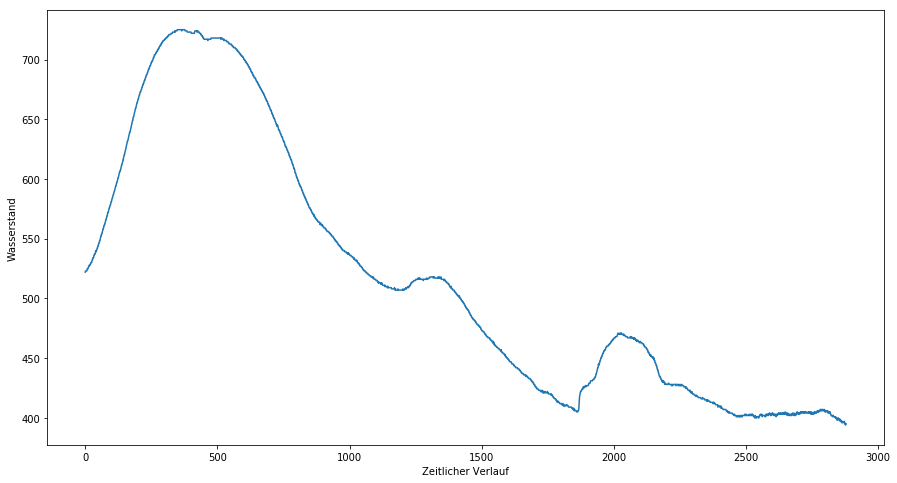

In [9]:
fig = plt.figure(figsize=(15,8))
plt.plot(np.arange(0, len(Bonn[-2880:,0])), Bonn[-2880:,0])
plt.xlabel('Zeitlicher Verlauf')
plt.ylabel('Wasserstand')

Und wir plotten einmal alle Jahre übereinander, um zu schauen, ob es Regelmäßigkeiten gibt:

In [10]:
# Daten nach Jahr Aufteilen
yearly_data = []
for i in range(1989, 2013):
    yearly_data.append(no_NaN_df.loc[str(i) + '-01-01 00:00:00+00:00': str(i) + '-12-31 23:45:00+00:00',:])

Text(0.5, 0, 'Jahresverlauf')

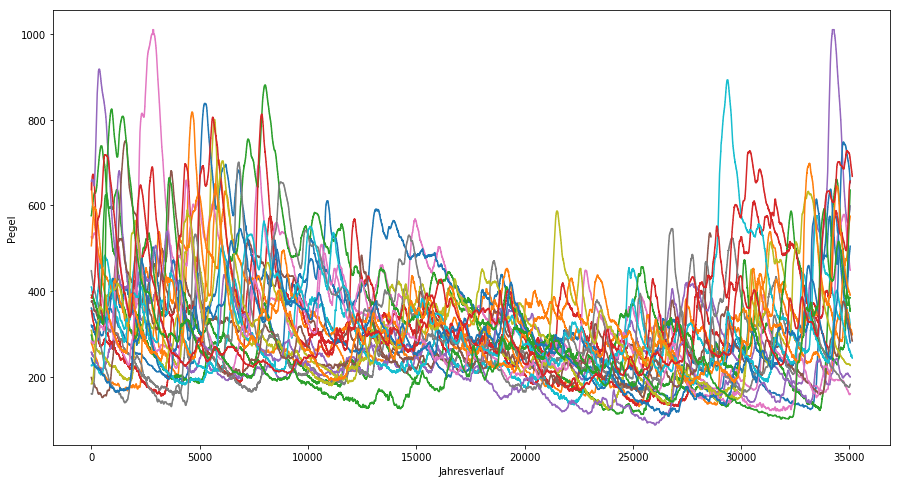

In [11]:
# zumindest ab Eintrag yearly_data[9] sind Daten vollständig
# plotte daten
fig = plt.figure(figsize=(15,8))
for i in range(0, 24):
    plt.plot(np.arange(0, len(yearly_data[i])), yearly_data[i]['Bonn'])

plt.ylabel('Pegel')
plt.xlabel('Jahresverlauf')

Schließlich prüfen wir die Vollständigkeit der Daten für Bonn:

In [12]:
# Vollständigkeit der Daten innerhalb Jahre prüfen
yearly_data_size = np.zeros(24)
for i in range(0, 24):
    yearly_data_size[i] = yearly_data[i].shape[0]
yearly_data_size

array([35040., 35040., 35040., 34080., 35037., 28611., 35040., 32160.,
       32064., 35040., 35040., 35136., 35040., 35040., 35040., 35136.,
       35040., 35040., 35040., 35135., 35040., 35040., 35040., 35136.])

# Linear Regression Model

In [13]:
#imports
from scipy.stats import norm
from datetime import datetime
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA

## Creation of training data

We train our linear regression model on water level measurements from every station at the following times: current as well as 15min, 30min, 1h, 3h and 6h ago. This gives us 90-dimensional data at for every point in time.

In [14]:
#get water levels out of the dataframe into an ndarray
water_levels=no_NaN_df.values 

In [15]:
#create data points

#we need to slice the arrays so data from different points in time aligns properly

#current
current_data=water_levels[24:-48]

#15min ago
last_data=water_levels[23:-49]

#30min
last2_data=water_levels[22:-50]

#1h
oneh_ago_data=water_levels[20:-52]

#3h
threeh_ago_data=water_levels[12:-60]

#6h
sixh_ago_data=water_levels[:-72]


#gather all data into a single set
independent_variable = np.c_[current_data, last_data, last2_data, oneh_ago_data, threeh_ago_data, sixh_ago_data] 


#get the water levels in Bonn into a separate variable for training
dependent_variable = no_NaN_df[['Bonn']].values

#align properly so these are 12h in the future
dependent_variable_reduced = dependent_variable[72:]

## Training of the model

We're using scikit-learn's TimeSeriesSplit function, which trains a linear regression model on successively larger batches of data, beginning with the oldest and adding more with every iteration. This way we can watch the development of the error and be more sure of the quality of the model.

We will do PCA later on, but have included the original code without PCA below in order to show the differences and the loss:

In [16]:
number_splits = 20
ts=TimeSeriesSplit(n_splits=number_splits)

for train_index, test_index in ts.split(independent_variable):
    #create train and test set
    independent_variable_train = independent_variable[train_index]
    independent_variable_test = independent_variable[test_index]
    dependent_variable_train = dependent_variable_reduced[train_index]
    dependent_variable_test = dependent_variable_reduced[test_index]
    
    #fit linear regression model
    reg = LinearRegression(fit_intercept=True, normalize =True)
    regression_model_fit = reg.fit(independent_variable_train, dependent_variable_train)
    
    #prediction on test set
    prediction_regression_model=reg.predict(independent_variable_test)
    
    #output mse
    print(np.sum(((prediction_regression_model-dependent_variable_test)**2))/dependent_variable_test.size)

    

16.19575979253652
8.888021588591227
22.034008685644675
137.11004718203807
27.216070581858133
30.054966931300317
20.712245993828876
23.09623714226253
20.045427190029493
19.1387874460777
28.416644143349412
8.992116742766717
10.264673326020354
9.814990186441396
13.713370244743826
10.504873868536656
12.06107366956205
18.360031745058524
9.725398817824937
11.168448239862917


## PCA

Training on 90-dimensional data takes quite a while. Using PCA we can reduce dimensionality to about 30 without losing much accuracy, which makes training significantly quicker. First we normalize the data so PCA works:

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler2 = StandardScaler()
independent_variable_scaled = scaler.fit_transform(independent_variable)
dependent_variable_reduced_scaled = scaler2.fit_transform(dependent_variable_reduced)

Now we run PCA:

In [20]:
pca=PCA(n_components=30)
pca.fit(independent_variable_scaled)
pca_independent_var=pca.transform(independent_variable_scaled)

Let's take a quick look at the explained variance:

Text(0, 0.5, 'Erklärte Varianz')

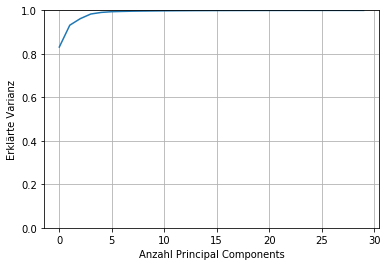

In [21]:
# Calculating the explanied variance of each Principal Component

fig = plt.figure()
ax = fig.add_subplot(111)

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_explained_variance)
ax.grid() 
ax.set_ylim([0,1])
ax.set_xlabel('Anzahl Principal Components')
ax.set_ylabel('Erklärte Varianz')

In [22]:
cumulative_explained_variance

array([0.83119182, 0.93181521, 0.96189974, 0.98316903, 0.99057395,
       0.99385248, 0.99514524, 0.99622859, 0.99682772, 0.99737029,
       0.99786027, 0.99820021, 0.99850514, 0.99878266, 0.9989654 ,
       0.99912336, 0.99924281, 0.99934729, 0.99944634, 0.99953402,
       0.99959653, 0.99964945, 0.99969695, 0.99972864, 0.99975836,
       0.99978472, 0.9998073 , 0.9998278 , 0.99984817, 0.99986725])

As we can see, we could have gotten 99% explained variance on only 5 components - that's just not enough for this prediction: if the water level is 500cm, 1% means 5cm, which is more inaccuracy than we can allow.

In [23]:
#run training on data transformed by pca

number_splits = 20
pca_ts=TimeSeriesSplit(n_splits=number_splits)

for train_index, test_index in ts.split(pca_independent_var):
    #create train and test set
    pca_ind_train = pca_independent_var[train_index]
    pca_ind_test = pca_independent_var[test_index]
    pca_dep_train = dependent_variable_reduced_scaled[train_index]
    pca_dep_test = dependent_variable_reduced_scaled[test_index]
    
    #fit linear regression model
    pca_reg = LinearRegression(fit_intercept=True)
    pca_regression_model_fit = pca_reg.fit(pca_ind_train, pca_dep_train)
    
    #prediction on test set
    pca_prediction_regression_model_scaled = pca_reg.predict(pca_ind_test)
    pca_prediction_regression_model = scaler2.inverse_transform(pca_reg.predict(pca_ind_test))
    
    #output mse
    residuals = pca_prediction_regression_model-scaler2.inverse_transform(pca_dep_test)
    MSE_PCA = np.sum(residuals**2)/pca_dep_test.size
    print(MSE_PCA)

20.58579588916016
11.789952436138995
26.482683843151825
138.63377140788046
31.050270265230488
32.46357892434797
22.13459253010532
26.820396652157115
24.933777187880185
21.916358842285593
35.45704258220426
12.050031369083557
13.777014383388487
11.710707342474311
17.937535311806844
13.918393169170168
16.239897812153153
24.673107522105646
13.901725979388775
13.624076131669126


## Accuracy

Now we want to know how good our prediction actually is. Therefore, we compare it to a simple model that uses the current water level as a prediction for the water level in 12h. 

In [24]:
#compute residuals
residuals_regression = dependent_variable_test-pca_prediction_regression_model

In [25]:
#simple comparison model:
#prediction for water level in 12h is the current level
#compute residuals:
comparison_model = dependent_variable[-len(dependent_variable_test):]-dependent_variable[-len(dependent_variable_test)-48:-48]

#compute mse&mae of the comparison model
mse_comparison = np.sum((comparison_model)**2)/len(comparison_model)
mae_comparison = np.sum(abs(comparison_model))/len(comparison_model)

#compute mse&mae of the prediction computed by linear regression with pca
mse_prediction = np.sum((residuals_regression)**2)/len(residuals_regression)
mae_prediction = np.sum(abs(residuals_regression))/len(residuals_regression)


#mse
print('Comparison Model:')
print('MSE:', mse_comparison)
print('MAE:', mae_comparison)


#mae
print('Regression Model:')
print('MSE:', mse_prediction)
print('MAE:', mae_prediction)

Comparison Model:
MSE: 165.93270013568522
MAE: 8.478105341063278
Regression Model:
MSE: 13.624076131669126
MAE: 2.4335755916714534


As we can see, the regression is quite a lot better than the other model. This can also be observed by plotting the residuals against the water levels:

(-35, 80)

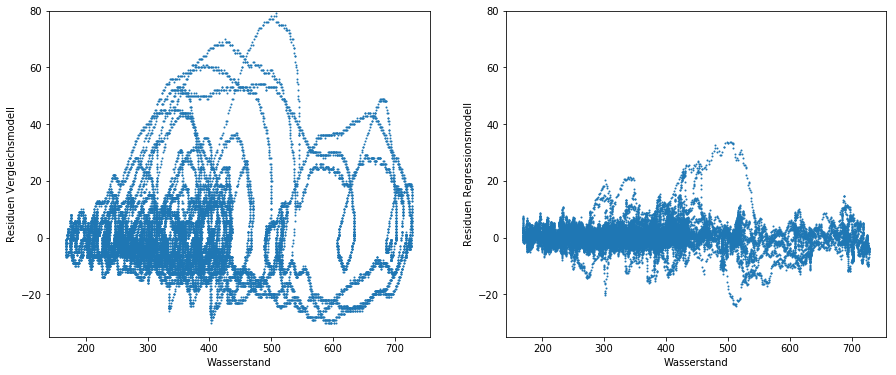

In [26]:
# plot residuals
fig, ax = plt.subplots(1,2, figsize = (15, 6))
ax[1].scatter(dependent_variable_test, residuals_regression, s = 1)
ax[0].scatter(dependent_variable_test, comparison_model, s = 1)
ax[0].set_xlabel('Wasserstand')
ax[0].set_ylabel('Residuen Vergleichsmodell')

ax[1].set_xlabel('Wasserstand')
ax[1].set_ylabel('Residuen Regressionsmodell')

ax[0].set_ylim([-35, 80])
ax[1].set_ylim([-35, 80])


This gives us the additional information that our model remains reasonably accurate even for high water levels. We can also observe this in the next plot, which plots real and predicted water levels against each other:

Text(0, 0.5, 'vorhergesagter Wasserstand')

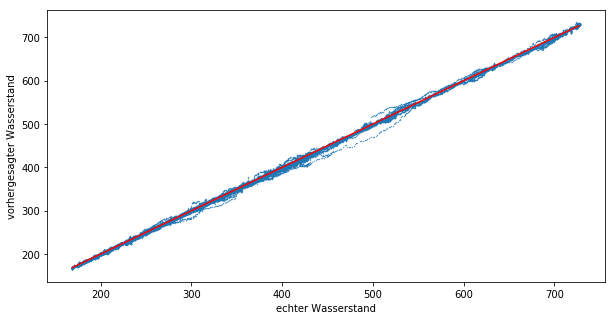

In [27]:
# plot real data <=> predictions

figure(figsize = (10,5))
plt.scatter(dependent_variable_test, prediction_regression_model, s = 0.1)
plt.plot(np.arange(min(dependent_variable_test), max(dependent_variable_test)), 
         np.arange(min((dependent_variable_test)), max(dependent_variable_test)), c = 'red')
plt.xlabel('echter Wasserstand')
plt.ylabel('vorhergesagter Wasserstand')

Finally, we take a look at a random time slice from the test set and plot real vs predicted water levels over time:

Datenindex: 24021 von 39535


Text(0, 0.5, 'Wasserstand')

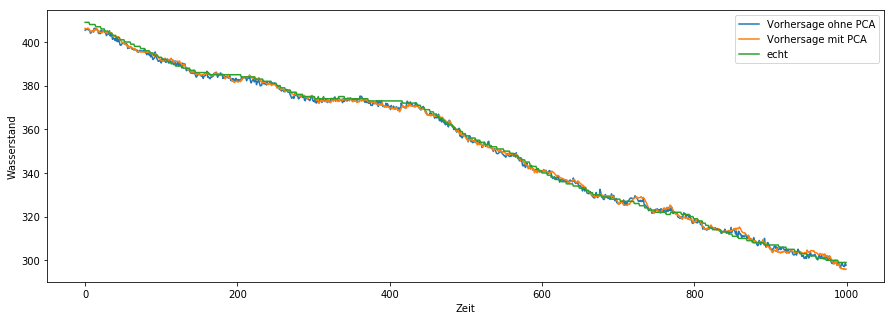

In [28]:
# plot echte Zeitreihe <=> vorhergesagte Zeitreihe
k = 1000 # Länge vom geplotteten Intervall
zuf_ausschnitt = np.random.randint(0,len(residuals_regression)-k)
figure(figsize = (15,5))

prediction_wo_PCA = plt.plot(np.arange(0, min(k,len(residuals_regression))), 
                        prediction_regression_model[zuf_ausschnitt:min(len(residuals_regression),zuf_ausschnitt+k)], 
                        label = 'Vorhersage ohne PCA')

prediction_with_PCA = plt.plot(np.arange(0, min(k,len(residuals_regression))), 
                        pca_prediction_regression_model[zuf_ausschnitt:min(len(residuals_regression),zuf_ausschnitt+k)], 
                        label = 'Vorhersage mit PCA')

real = plt.plot(np.arange(0, min(k,len(residuals_regression))),
                dependent_variable_test[zuf_ausschnitt:min(len(residuals_regression),zuf_ausschnitt+k)], label = 'echt')

plt.legend()
print("Datenindex:",zuf_ausschnitt ,"von", len(residuals_regression)-k)

plt.xlabel('Zeit')
plt.ylabel('Wasserstand')


## Prediction on recent measurements

Finally, we'll make a prediction on recent measurements just for fun:

In [29]:
#get data
dfcur = levels.to_frame(recent=True)
dfcur=dfcur.dropna()

Parse Andernach
Parse Bingen
Parse Bonn
Parse Frankfurt Osthafen
Parse Kalkofen Neu
Parse Kaub
Parse Koblenz
Parse Koblenz Up
Parse Mainz
Parse Oberwinter
Parse Oestrich
Parse Raunheim
Parse Rockenau Ska
Parse Speyer
Parse Worms


In [30]:
#test on recent measurements

#process the data so it matches our model:
test=dfcur.values
test0=test[25:-48]
testl=test[24:-49]
testl2=test[23:-50]
test1=test[21:-52]
test3=test[13:-60]
test6=test[1:-72]

data=np.c_[test0, testl, testl2, test1, test3, test6]

#get current water levels so we can compute the error of our model:
current_water_levels=(dfcur['Bonn'].values)[73:]


#without pca:
res=regression_model_fit.predict(data)
res=res.reshape(current_water_levels.size)

print('MSE without PCA:', np.sum((current_water_levels-res)**2)/current_water_levels.size)

#with pca:
new_data_scaled = scaler.transform(data)
pca_data=pca.transform(new_data_scaled)

res2=pca_regression_model_fit.predict(pca_data)
res2=res2.reshape(current_water_levels.size)
res2=scaler2.inverse_transform(res2)

print('MSE with PCA:', np.sum((current_water_levels-res2)**2)/current_water_levels.size)

print('The Rhine water level in 12h is going to be:', res[res.size-1], 'cm')

MSE without PCA: 8.167703800960295
MSE with PCA: 10.624776022548474
The Rhine water level in 12h is going to be: 284.38517444023176 cm


As we can see, we barely lose any accuracy through PCA on this data set as well.

# Neural Network Model

For comparison, we also created a NN model for the problem:

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# the training set will consist of the 100.000 most recent Data points
k = 100000
anzahl_daten = independent_variable.shape[0]-k
anzahl_features = 30 #  how many principal components will we use in our data
timesteps_per_datapoint = 1 # how many different timesteps will we be looking at for every prediction
scaled_data = pca_independent_var[:anzahl_daten,:anzahl_features]
labels_NN = dependent_variable_reduced_scaled[:anzahl_daten]

Using TensorFlow backend.


In [32]:
# Erstelle Feature und Labelset und bringe sie in richtige Form:
# features_pro_datenpunkt gibt an, wieviele vergangene Zeitschritte man pro Vorhersage betrachtet
def data_preprocessing_LSTM(data, labels, timesteps_per_datapoint):
    featureset = []
    labelset = []
    
    for i in range(timesteps_per_datapoint, data.shape[0]):
        featureset.append(data[i-timesteps_per_datapoint:i,:])
        labelset.append(labels[i])
    
    # in richtige Form für keras bringen
    featureset = np.array(featureset)
    labelset = np.array(labelset)
    #featureset = np.reshape(featureset, (featureset.shape[0], featureset.shape[1], featureset.shape[2]))
    
    return featureset, labelset


In [33]:

featureset_scaled, labelset_scaled = data_preprocessing_LSTM(scaled_data, labels_NN, timesteps_per_datapoint)

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import Adam

model = Sequential()
#model.add(LSTM(10, input_shape=(featureset_scaled.shape[1], featureset_scaled.shape[2]), return_sequences = True, activation="sigmoid"))
#model.add(LSTM(10, return_sequences = True, activation="sigmoid"))
model.add(Flatten())
model.add(Dense(16, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="linear"))

model.compile(loss='mean_squared_error', optimizer=Adam())

In [35]:
hist = model.fit(featureset_scaled, labelset_scaled, epochs=200, batch_size=10000, verbose=2, validation_split=0.3)

Train on 525877 samples, validate on 225377 samples
Epoch 1/200
 - 1s - loss: 0.4348 - val_loss: 0.0951
Epoch 2/200
 - 1s - loss: 0.0639 - val_loss: 0.0324
Epoch 3/200
 - 1s - loss: 0.0315 - val_loss: 0.0216
Epoch 4/200
 - 1s - loss: 0.0199 - val_loss: 0.0152
Epoch 5/200
 - 1s - loss: 0.0136 - val_loss: 0.0117
Epoch 6/200
 - 1s - loss: 0.0103 - val_loss: 0.0096
Epoch 7/200
 - 1s - loss: 0.0082 - val_loss: 0.0080
Epoch 8/200
 - 1s - loss: 0.0069 - val_loss: 0.0069
Epoch 9/200
 - 1s - loss: 0.0060 - val_loss: 0.0061
Epoch 10/200
 - 1s - loss: 0.0053 - val_loss: 0.0054
Epoch 11/200
 - 1s - loss: 0.0048 - val_loss: 0.0048
Epoch 12/200
 - 1s - loss: 0.0043 - val_loss: 0.0044
Epoch 13/200
 - 1s - loss: 0.0040 - val_loss: 0.0041
Epoch 14/200
 - 1s - loss: 0.0037 - val_loss: 0.0037
Epoch 15/200
 - 1s - loss: 0.0035 - val_loss: 0.0035
Epoch 16/200
 - 1s - loss: 0.0033 - val_loss: 0.0033
Epoch 17/200
 - 1s - loss: 0.0031 - val_loss: 0.0031
Epoch 18/200
 - 1s - loss: 0.0030 - val_loss: 0.0029
Epo

Epoch 154/200
 - 1s - loss: 0.0013 - val_loss: 0.0010
Epoch 155/200
 - 1s - loss: 0.0013 - val_loss: 9.9689e-04
Epoch 156/200
 - 1s - loss: 0.0013 - val_loss: 0.0010
Epoch 157/200
 - 1s - loss: 0.0013 - val_loss: 0.0010
Epoch 158/200
 - 1s - loss: 0.0013 - val_loss: 0.0010
Epoch 159/200
 - 1s - loss: 0.0013 - val_loss: 0.0010
Epoch 160/200
 - 1s - loss: 0.0013 - val_loss: 0.0010
Epoch 161/200
 - 1s - loss: 0.0013 - val_loss: 9.8896e-04
Epoch 162/200
 - 1s - loss: 0.0013 - val_loss: 9.9758e-04
Epoch 163/200
 - 1s - loss: 0.0013 - val_loss: 0.0010
Epoch 164/200
 - 1s - loss: 0.0013 - val_loss: 0.0010
Epoch 165/200
 - 1s - loss: 0.0013 - val_loss: 0.0010
Epoch 166/200
 - 1s - loss: 0.0013 - val_loss: 9.8678e-04
Epoch 167/200
 - 1s - loss: 0.0013 - val_loss: 0.0010
Epoch 168/200
 - 1s - loss: 0.0013 - val_loss: 0.0010
Epoch 169/200
 - 1s - loss: 0.0013 - val_loss: 9.9781e-04
Epoch 170/200
 - 1s - loss: 0.0013 - val_loss: 0.0010
Epoch 171/200
 - 1s - loss: 0.0013 - val_loss: 0.0010
Epoch 17

Text(0, 0.5, 'validation loss')

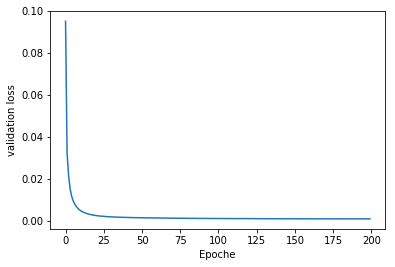

In [36]:
# plot the history of the loss on the validation set
plt.plot(hist.history["val_loss"])
plt.xlabel('Epoche')
plt.ylabel('validation loss')

In [37]:
# after training a lot of different models, we take the best performing one and test it on our testset

# initialize our testset
testset_NN = pca_independent_var[:-anzahl_daten, :anzahl_features]
labels_test_NN_temp = dependent_variable_reduced[:-anzahl_daten]
featureset_test, labelset_test_NN = data_preprocessing_LSTM(testset_NN, labels_test_NN_temp, timesteps_per_datapoint)


In [38]:
predictions_NN_scaled = model.predict(featureset_test)

In [39]:
# Since we use normalized Data in our NN we have to revert them back to get our MSE
predictions_NN = scaler2.inverse_transform(predictions_NN_scaled)
labelset = scaler2.inverse_transform(dependent_variable_reduced_scaled[:-anzahl_daten])

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

MSE_NN = mean_squared_error(labelset_test_NN, predictions_NN)
MAE_NN = mean_absolute_error(labelset_test_NN, predictions_NN)
print("MSE_NN:", MSE_NN)
print("MAE_NN:", MAE_NN)


MSE_NN: 12.732323335119293
MAE_NN: 2.4740838773439005


Text(0, 0.5, 'Wasserstand')

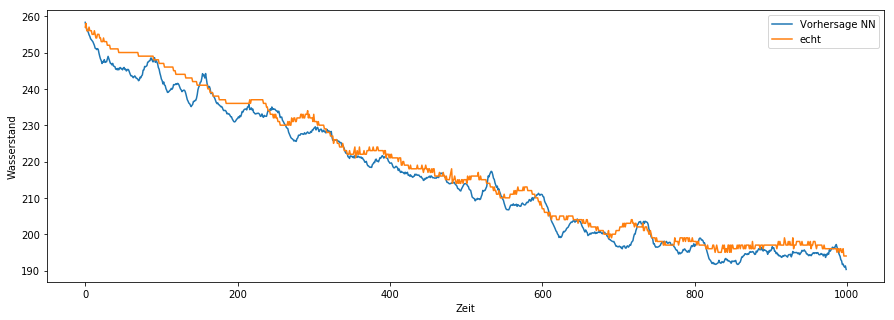

In [42]:
# plot first 1000 data points of the training set

figure(figsize = (15,5))

cc = plt.plot(np.arange(0, 1000), 
                        predictions_NN[:1000], 
                        label = 'Vorhersage NN')
dd = plt.plot(np.arange(0, 1000), 
                        labelset[:1000], 
                        label = 'echt')
plt.legend()

plt.xlabel('Zeit')
plt.ylabel('Wasserstand')